# Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
data1=pd.read_csv("C:\\Users\\Anks\\Downloads\\Salary_Data.csv")


In [6]:
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


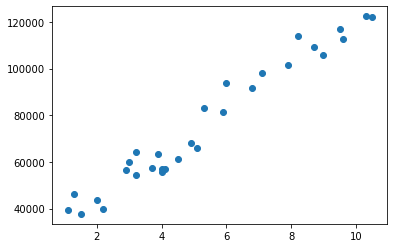

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data1['YearsExperience'],data1['Salary'])

In [11]:
x = np.array(data1["YearsExperience"]).reshape(-1,1)
print("Dimension : ",x.ndim)
print("Shape : ",x.shape)

Dimension :  2
Shape :  (30, 1)


In [12]:
y = np.array(data1["Salary"]).reshape(-1,1)
print("Dimension : ",y.ndim)
print("Shape : ",y.shape)

Dimension :  2
Shape :  (30, 1)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
print("Length of X_Train : ",len(x_train))
print("Length of Y_Train : ",len(y_train))
print("Length of X_Test : ",len(x_test))
print("Length of Y_Test : ",len(y_test))

Length of X_Train :  24
Length of Y_Train :  24
Length of X_Test :  6
Length of Y_Test :  6


In [16]:
x_test

array([[ 9.6],
       [ 8.2],
       [10.5],
       [ 2.9],
       [ 3.7],
       [ 3.2]])

In [17]:
y_test

array([[112635.],
       [113812.],
       [121872.],
       [ 56642.],
       [ 57189.],
       [ 54445.]])

In [18]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.score(x_test,y_test)


0.9700884480427319

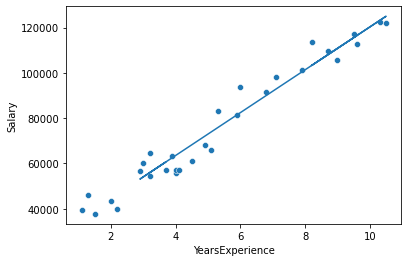

In [21]:
sns.scatterplot(x=data1.YearsExperience, y=data1.Salary)
plt.plot(x_test,model.predict(x_test))
plt.show()

In [22]:
model.coef_

array([[9457.63899208]])

In [23]:
model.intercept_

array([25678.4745942])

In [24]:
y_predict = np.round(model.predict(x_test),2)
y_predict[0:,0]

array([116471.81, 103231.11, 124983.68,  53105.63,  60671.74,  55942.92])

In [25]:
x_test[0:,0]

array([ 9.6,  8.2, 10.5,  2.9,  3.7,  3.2])

In [26]:
y_test[0:,0]

array([112635., 113812., 121872.,  56642.,  57189.,  54445.])

In [28]:
data_1 = {"Test_YearsExperience" : x_test[0:,0], "Actual_Salary" : y_test[0:,0], "Predicted_Salary" : y_predict[0:,0]}
data_1 = pd.DataFrame(data_1)
data_1.to_csv("C:\\Users\\Anks\\Downloads\\Salary_Data.csv") 
data_1.head()

,Test_YearsExperience,Actual_Salary,Predicted_Salary
0,9.6,112635.0,116471.81
1,8.2,113812.0,103231.11
2,10.5,121872.0,124983.68
3,2.9,56642.0,53105.63
4,3.7,57189.0,60671.74


In [37]:
import statsmodels.formula.api as smf


In [40]:
linear_model = smf.ols("y~x", data=data1).fit()


In [41]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [42]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        23:45:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""